In [1]:
import os
import sys
import networkx as nx
import pathlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=10,10


sys.path.append('/home/chris/src/provenance_py')

if __name__ == "__main__" and __package__ is None:
    __package__ = "provenance_lib"

from .parse import ProvDAG, ProvNode, Config


In [3]:
cwd = os.getcwd()
parent = pathlib.Path(cwd).parent
DATA_DIR = os.path.join(parent, 'tests/data')
qzv = os.path.join(DATA_DIR, 'v5_uu_emperor.qzv')
dag = ProvDAG(archive_fp=qzv)


AttributeError: 'ProvDAG' object has no attribute 'parser_results'

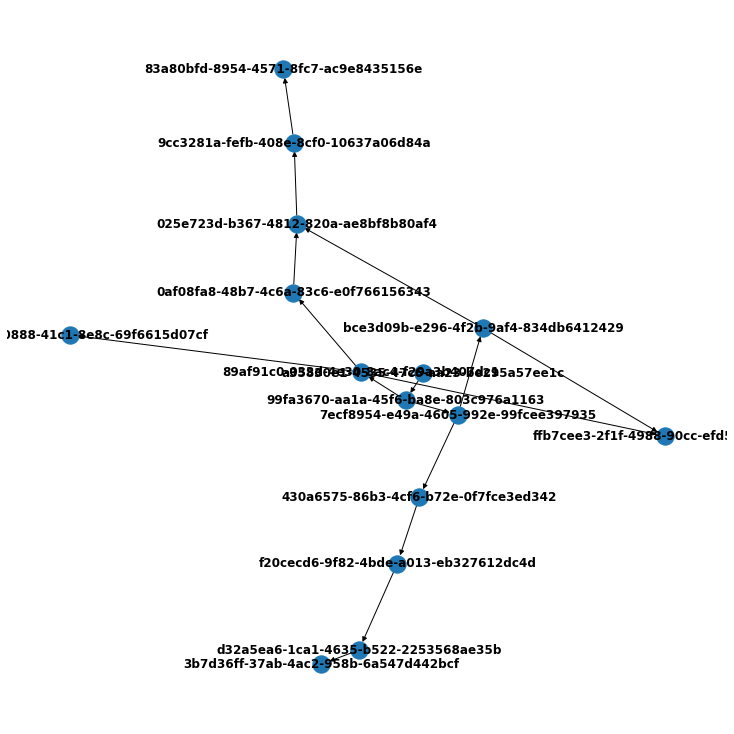

In [4]:
nx.draw(dag.dag, with_labels=True, font_weight="bold")

In [7]:
# Inner pipeline results, like alias-of results, may or may not be terminal.
# Here, ffb is our true terminal output
# 3b7 is an inner result aliased by bce3
# the other two are inner results from core-metrics
[node for node, out_degree in dag.dag.out_degree() if out_degree == 0]

['ffb7cee3-2f1f-4988-90cc-efd5184ef003',
 'aea3994b-0888-41c1-8e8c-69f6615d07cf',
 '83a80bfd-8954-4571-8fc7-ac9e8435156e',
 '3b7d36ff-37ab-4ac2-958b-6a547d442bcf']

In [9]:
# If we look at the nested view, we should see all independent actions, disregard inner actions.
# Even if some pipelines had unused inner Actions, we should get only one terminal output.
[node for node, out_degree in dag.nested_view.out_degree() if out_degree == 0]

['ffb7cee3-2f1f-4988-90cc-efd5184ef003']